# TASK 4

# RUNNING DECISON TREE CLASSIFIER ON IRIS

## IMPORTING LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## IMPORTING DATASET

In [3]:
data = pd.read_csv("task4-data.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Modeling

In [10]:
x = data.iloc[:,1:-1].copy()
y = data.iloc[:,-1].copy()

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 100)

In [15]:
model = DecisionTreeClassifier().fit(x_train,y_train)

In [16]:
p = model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test,p)

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 13]], dtype=int64)

Accuracy of 94.7%

In [38]:
y1 = []
x1 = []
for i in range(1 , 10 , 1):
    model = DecisionTreeClassifier(max_depth = i).fit(x_train,y_train)
    p = model.predict(x_test)
    t = confusion_matrix(y_test,p)
    acc = (t[0,0]+t[1,1]+t[2,2])/38 
    y1.append(acc)
    x1.append(i)
    

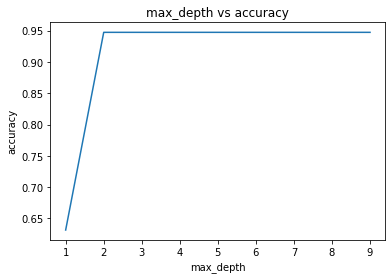

In [39]:
plt.figure()
plt.plot(x1,y1,"-")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("max_depth vs accuracy")
plt.show()

This shows that our tree has a constant accuracy after reaching height 2

## Visualizing our tree 

In [34]:
from sklearn.tree import plot_tree

[Text(133.92000000000002, 195.696, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [36, 40, 36]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.499\nsamples = 76\nvalue = [0, 40, 36]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.

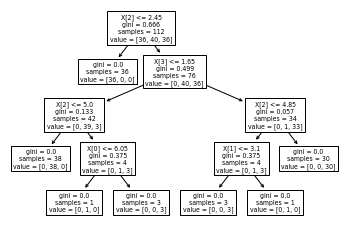

In [35]:
plot_tree(model)